# EDA Project on Exploring Drowsiness Patterns in Wearable Device Data 

### Dataset Description
The dataset was created using a Galaxy Watch4 smartwatch vital signs sensors. Data were collected from heart rate and PPG sensors (PPG includes 3 variations, green, red and infrared). The 'drowsiness' column refers to the label assigned by the user based on an adaptation of the Karolinska Sleepiness Scale (KSS) Labels range from 0.0 to 2.0, where 0.0 represents level 1 on the KSS scale (Alert), 1.0 corresponds to level 6 (Some signs of sleepiness), and 2.0 indicates level 8 (Sleepy, but some effort to stay awake)
- heartRate: Heart rate readings from the smartwatch sensors
- ppgGreen, ppgRed, ppgIR: PPG (Photoplethysmography) sensor readings in green, 
red, and infrared wavelengths respectively
-  drowsiness: Label indicating the level of drowsiness based on an adapted Karolinska
Sleepiness Scale (KSS). Values range from 0.0 to 2.0, where 0.0 represents
alertness and 2.0 represents significant drowsiness.
s.sinessense holder.



### Load The Dataset

In [1]:
#importing necessary libraries 
import pandas as pd

file="C:/Users/samri/Downloads/drowsiness_dataset.csv"
data=pd.read_csv(file)

#display first couple of rows of the dataset
print(data.head())

   heartRate   ppgGreen     ppgRed      ppgIR  drowsiness
0       54.0  1584091.0  5970731.0  6388383.0         0.0
1       54.0  1584091.0  5971202.0  6392174.0         0.0
2       54.0  1581111.0  5971295.0  6391469.0         0.0
3       54.0  1579343.0  5972599.0  6396137.0         0.0
4       54.0  1579321.0  5971906.0  6392898.0         0.0


### Data Overview

In [3]:
# Display basic information about the dataset
print(data.info())
#Here we can see there are 5 columns with their name and the datatypes

# Display the summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890260 entries, 0 to 4890259
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   heartRate   float64
 1   ppgGreen    float64
 2   ppgRed      float64
 3   ppgIR       float64
 4   drowsiness  float64
dtypes: float64(5)
memory usage: 186.5 MB
None
          heartRate      ppgGreen        ppgRed         ppgIR    drowsiness
count  4.890260e+06  4.890260e+06  4.890260e+06  4.890260e+06  4.890260e+06
mean   7.814245e+01  2.073589e+06  5.643653e+06  5.728191e+06  8.593592e-01
std    1.296635e+01  4.418773e+05  3.909626e+05  4.313052e+05  8.370285e-01
min    5.000000e+01  5.897580e+05  4.441989e+06  4.409976e+06  0.000000e+00
25%    6.800000e+01  1.780621e+06  5.368700e+06  5.402542e+06  0.000000e+00
50%    7.800000e+01  2.044658e+06  5.646039e+06  5.818748e+06  1.000000e+00
75%    8.700000e+01  2.333117e+06  5.927128e+06  6.016016e+06  2.000000e+00
max    1.190000e+02  3.530798e+06  6.842637e+06  7.061799e

In [4]:
#Finding the number of rows this dataset contains 
rows=len(data)
print(rows)

4890260


There are 5 columns and 4890260  rows in this Dataset

### Check for Missing Values 

In [5]:
#Checking to see if there are null values in each column 
print(data.isnull().sum())

heartRate     0
ppgGreen      0
ppgRed        0
ppgIR         0
drowsiness    0
dtype: int64


There seem to be no null values in any column. Indicating that we don't need to fill, replace or drop any values. 

### Add a 'Period' column and segment data

In [22]:
#Define the number of periods
num_periods=4

#Calculate the size of each period
period_size=len(data) //num_periods

#Create a period column
period_labels=['Morning', 'Afternoon', 'Evening', 'Night']
data['period']= pd.cut(data.index, bins=num_periods, labels=period_labels)

#Check the distribution of periods
print(data['period'].value_counts())

#Segment the data by period
morning_data=data[data['period']=='Morning']
afternoon_data=data[data['period']=='Afternoon']
evening_data=data[data['period']=='Evening']
night_data=data[data['period']=='Night']

#Display the new dataframe
print(data)

period
Morning      1222565
Afternoon    1222565
Evening      1222565
Night        1222565
Name: count, dtype: int64
         heartRate   ppgGreen     ppgRed      ppgIR  drowsiness   period
0             54.0  1584091.0  5970731.0  6388383.0         0.0  Morning
1             54.0  1584091.0  5971202.0  6392174.0         0.0  Morning
2             54.0  1581111.0  5971295.0  6391469.0         0.0  Morning
3             54.0  1579343.0  5972599.0  6396137.0         0.0  Morning
4             54.0  1579321.0  5971906.0  6392898.0         0.0  Morning
...            ...        ...        ...        ...         ...      ...
4890255       63.0  2286384.0  5783226.0  6356797.0         2.0    Night
4890256       63.0  2289887.0  5783786.0  6357004.0         2.0    Night
4890257       63.0  2291928.0  5784221.0  6358348.0         2.0    Night
4890258       63.0  2295386.0  5785012.0  6358565.0         2.0    Night
4890259       63.0  2296992.0  5783386.0  6357466.0         2.0    Night

[48902

### More Statistics

In [24]:
##Since the 'period' column is added. We will find the mode of that column.
#Mode: Most frequently occurred value in a dataset

#Calculate the Mode for period
mode_value=data[['period']].mode()
print("\nMode: ")
print(mode_value)

#multiple modes came because all perods occur in the same frequence
#To find the most frequent:

# Calculate value counts of each period
period_counts = data['period'].value_counts()

# Find the index (period name) of the maximum value (most frequent)
most_frequent_period = period_counts.idxmax()

print("Most frequent period:", most_frequent_period)


Mode: 
      period
0    Morning
1  Afternoon
2    Evening
3      Night
Most frequent period: Morning


In [25]:
#Re-Checking to see if there are null values in each column 
print(data.isnull().sum())

heartRate     0
ppgGreen      0
ppgRed        0
ppgIR         0
drowsiness    0
period        0
dtype: int64


No null values present! Indicating that we don't need to fill, replace or drop any values. 

## Data Visualization

In [10]:
#import all libraries 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#### Histograms

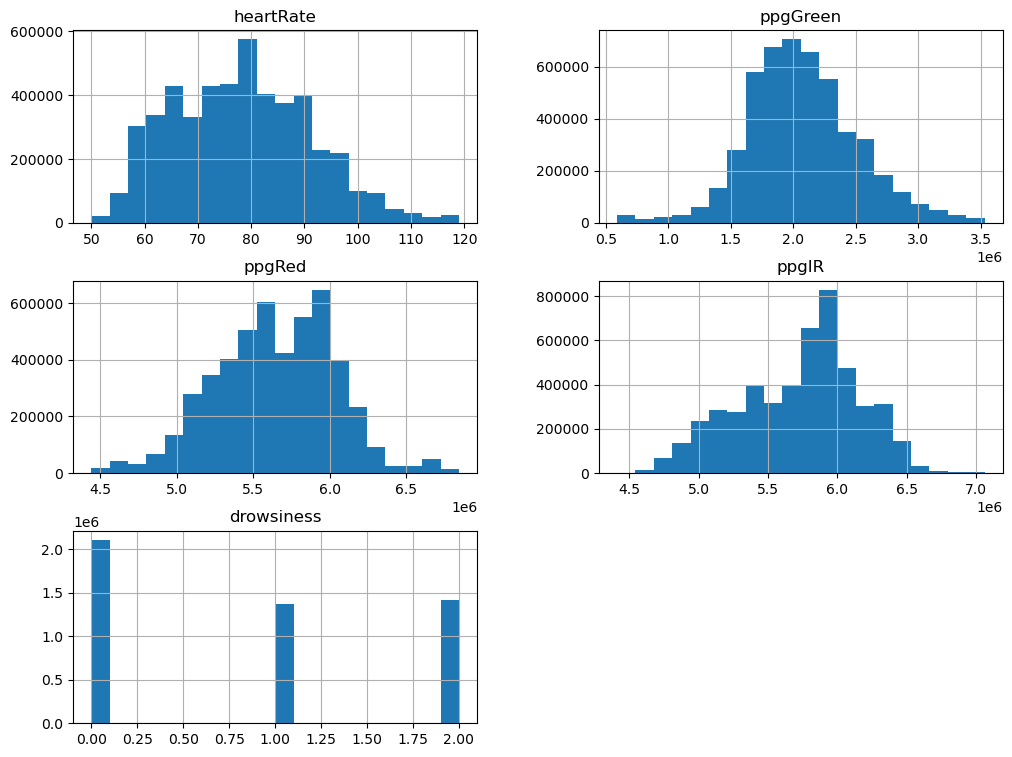

In [11]:
#Histogram for all numerical columns 

data.hist(bins=20, figsize=(12,9))
plt.grid()
plt.show()

1. The Histograms show distinct peaks around the center of the plots for heartRate, ppgGreen, ppgRed, and ppgIR; this indicates a few common values for these features. 
2. ppg Green is the most uniformly distributed with concentrated values from 1.5-2.5 ppg; while heartRate has a slight right skew and ppg REd and ppg IR have slight left skews.
3. The drowsiness histogram is categorized into three distinct levels: 0.0, 1.0, and 2.0. There are no intermediate values between these levels; the distribution is strictly concentrated at these three points. With the highest peak being 0.0 (most people being Alert according to the KSS Scale)


#### Boxplots

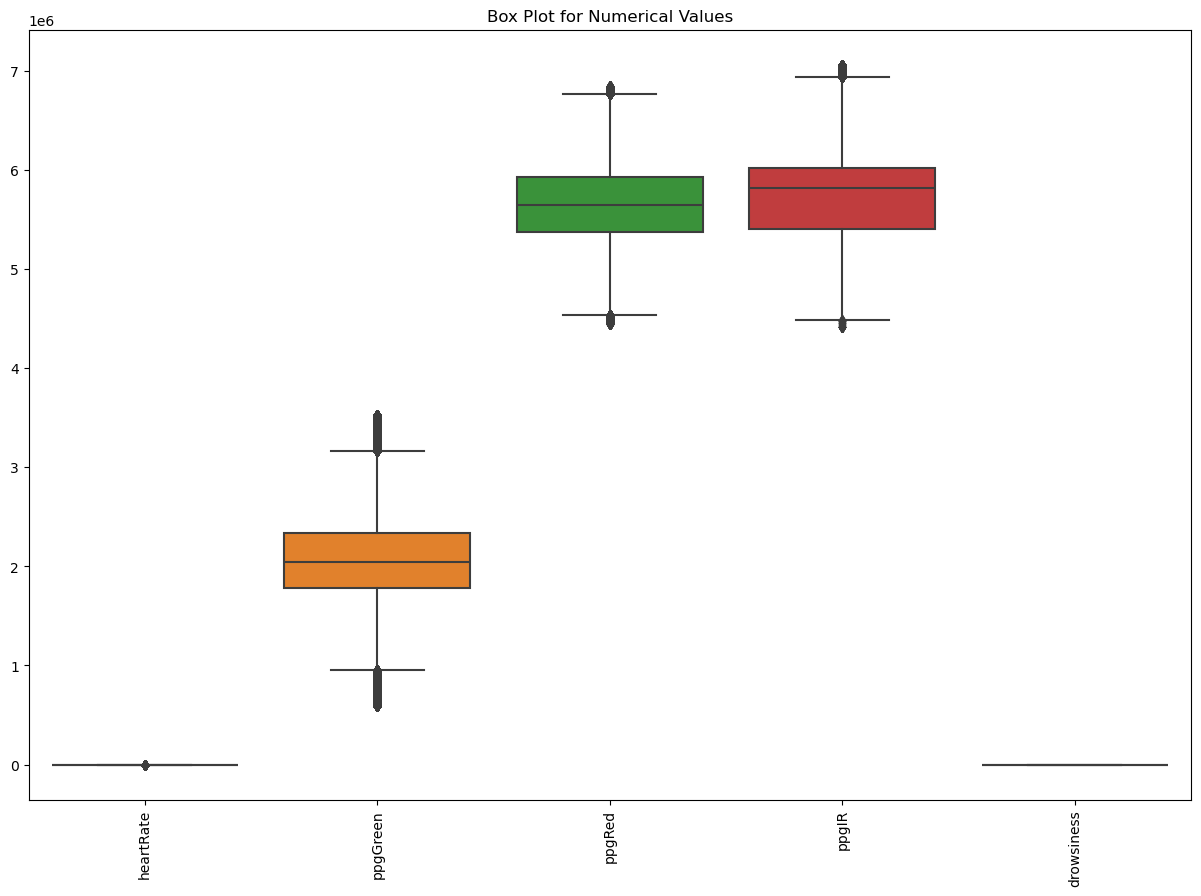

In [30]:
# Boxplot for all Numerical Values

plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Box Plot for Numerical Values")
plt.show()

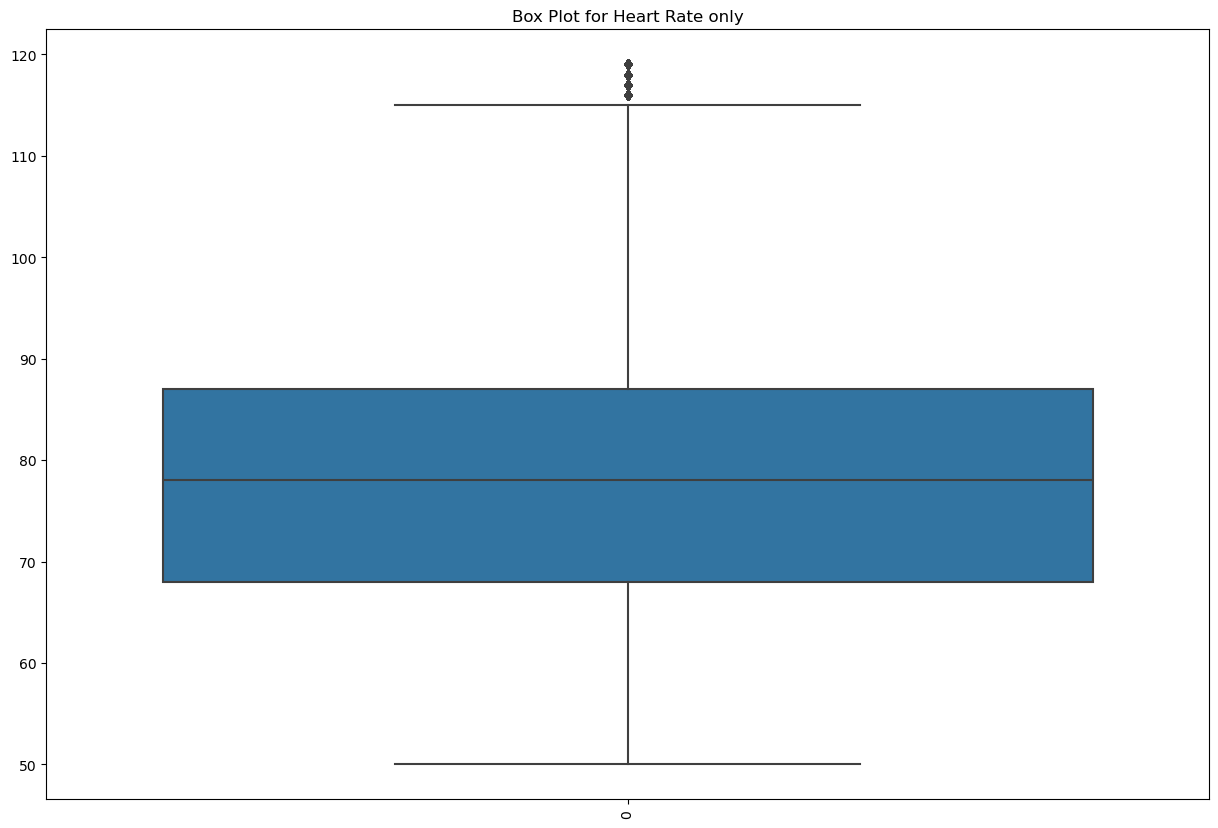

In [31]:
# Boxplot to get a better look at heartRate

plt.figure(figsize=(15,10))
sns.boxplot(data=[data['heartRate']])
plt.xticks(rotation=90)
plt.title("Box Plot for Heart Rate only")
plt.show()

1. The BoxPlot for ppgGreen, ppgRed, and ppgIR are have roughly around the same range, whereas heartRate and drowsiness are extremely concentrated. The concentration of drowsiness indicates that there is no variation but rather just constant values, which is true as we saw in the histogram.
2. ppg Green and Red have for the most part more symmetry about their respective medians in comparison to ppg IR.
3. all ppg's have outliers in high and low values, with ppg Green containing the most outliers out of the three.
4. Taking a look at Heart Rate, the median seems to a little less than 80 bpm. With some higher outliers around 120 bpm which seem to pull the slight right skew

#### Count Plot

C:\Users\samri\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


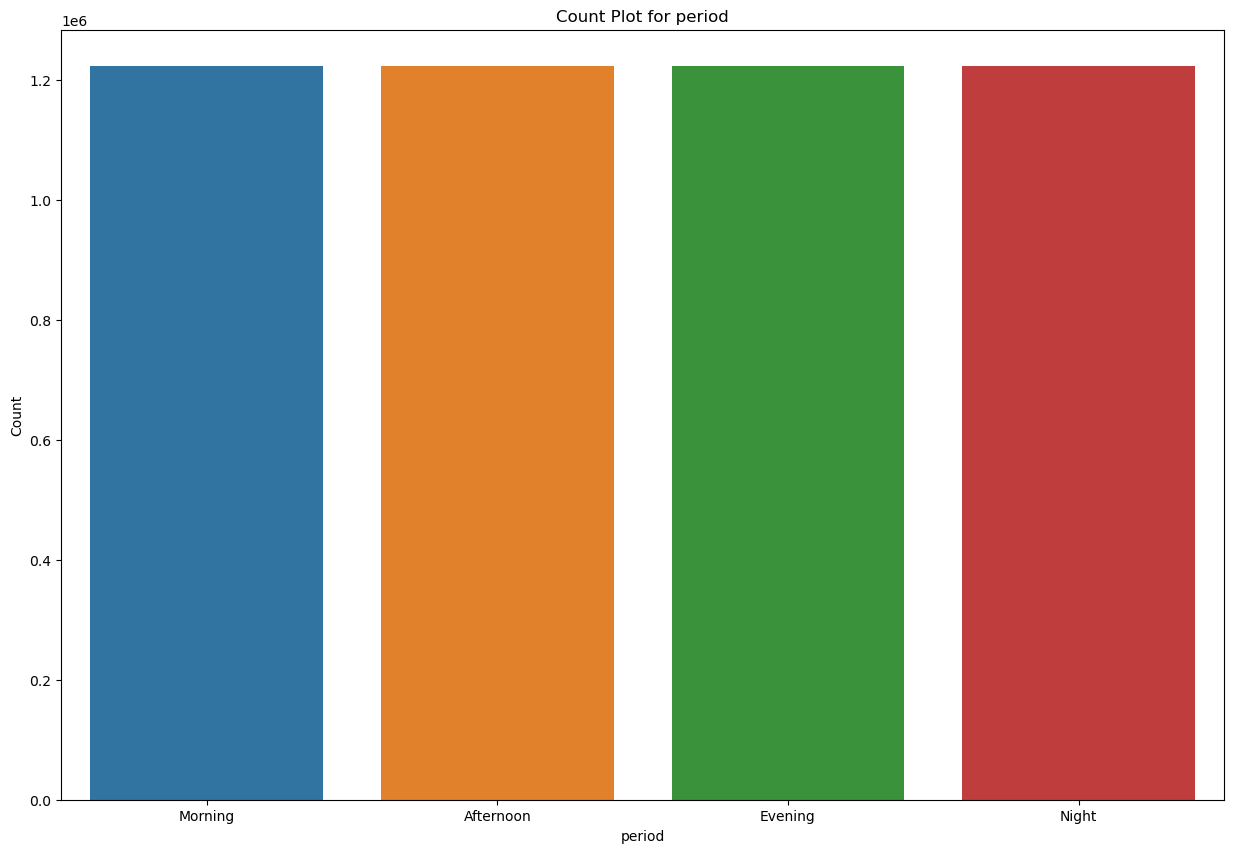

In [13]:
#Count plot for categorical column: 'period'

categorical = ['period']

# Loop through each categorical column (even though there's just one)
for col in categorical:
    plt.figure(figsize=(15, 10))
    sns.countplot(x=col, data=data)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

1. The count seems to be the same for all periods. They all occur at the same frequency 

#### KDE Plots

C:\Users\samri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


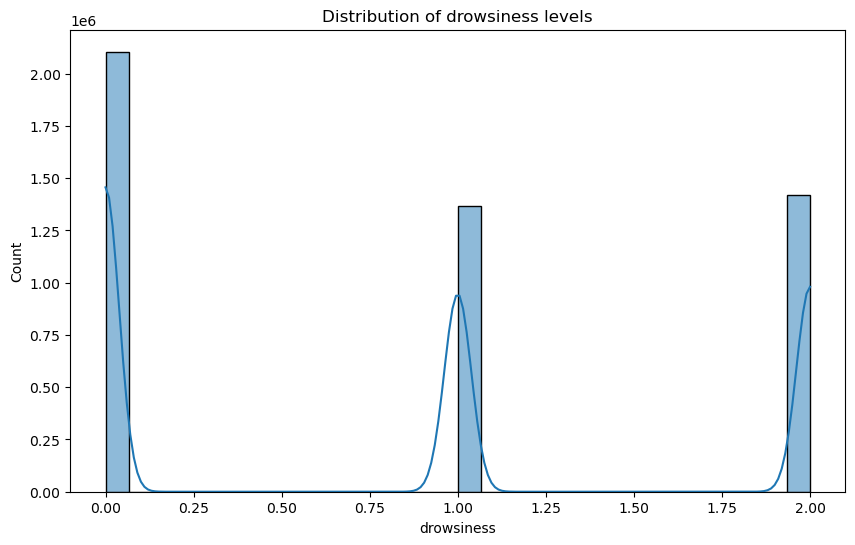

In [14]:
# Distribution of drowsiness

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='drowsiness', bins=30, kde=True)
plt.title('Distribution of drowsiness levels')
plt.show()

C:\Users\samri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


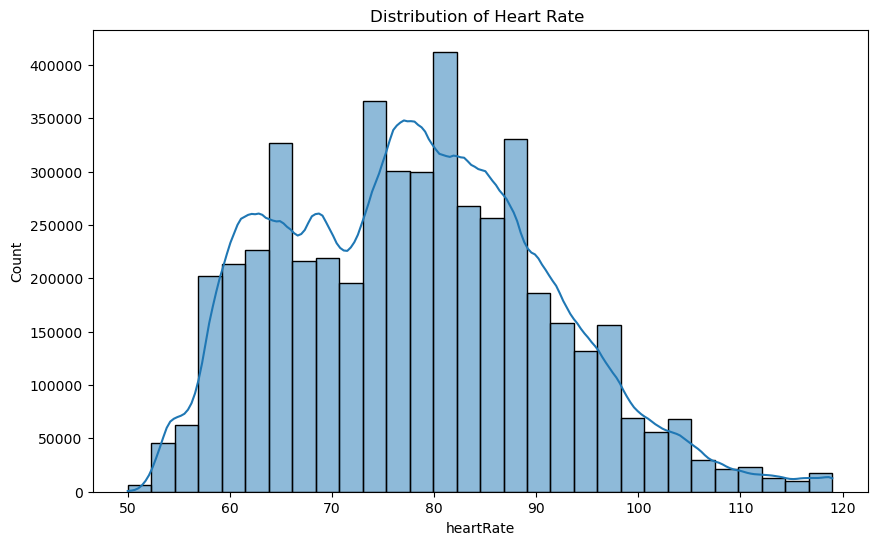

In [12]:
# Distribution of Heart Rate 
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='heartRate', bins=30, kde=True)
plt.title('Distribution of Heart Rate ')
plt.show()

1. The KDE plot  for the heart rate shows a right-skewed distribution, indicating that most heart rate values are concentrated between 50 and 90. The peak of the distribution is around 70-80, suggesting this is the most common range of heart rates.
2.  There is a noticeable decline in frequency for heart rates above 90, with a tail extending up to 120. This right skew suggests that while most heart rates are lower, there are some higher values that extend the distribution to the right.

#### Violin Plots 

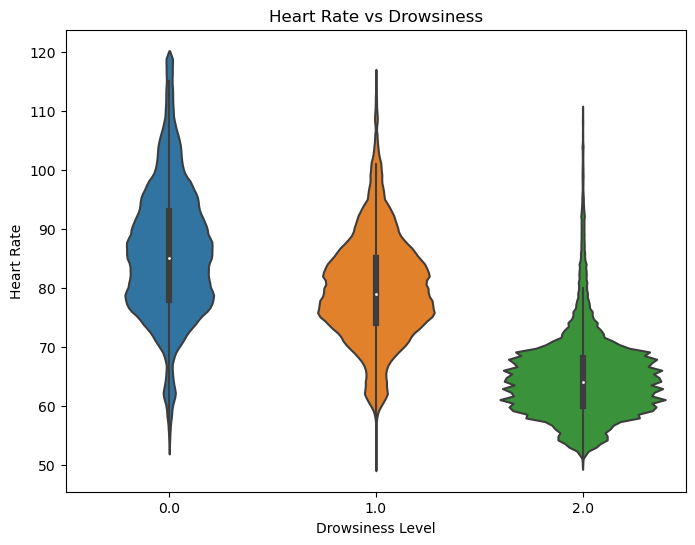

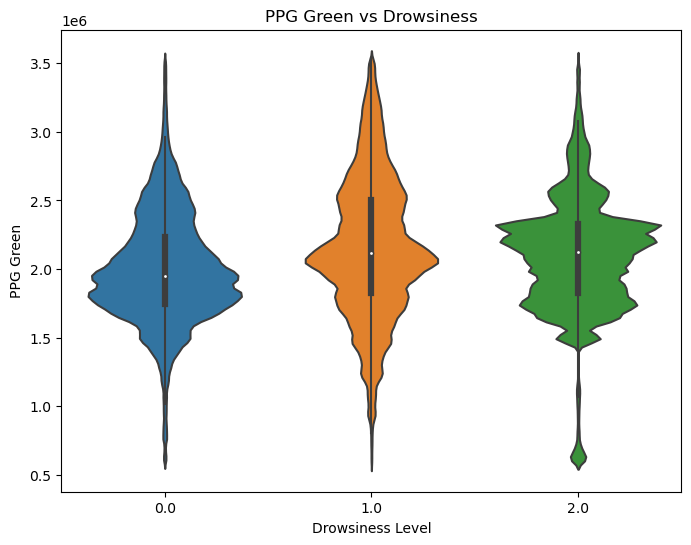

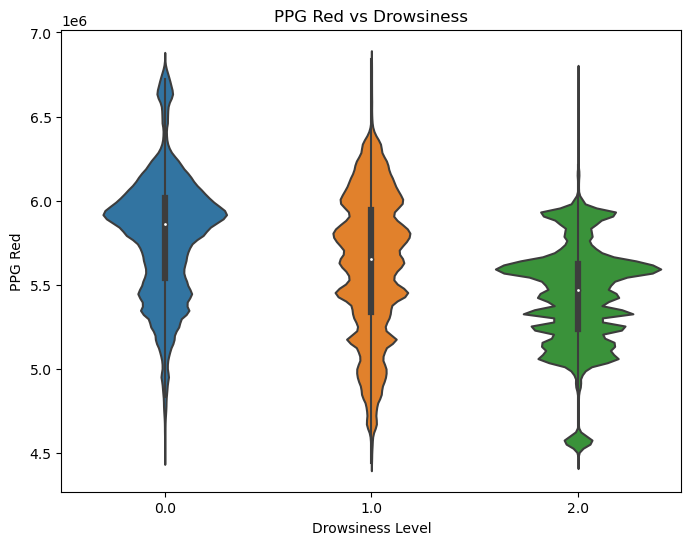

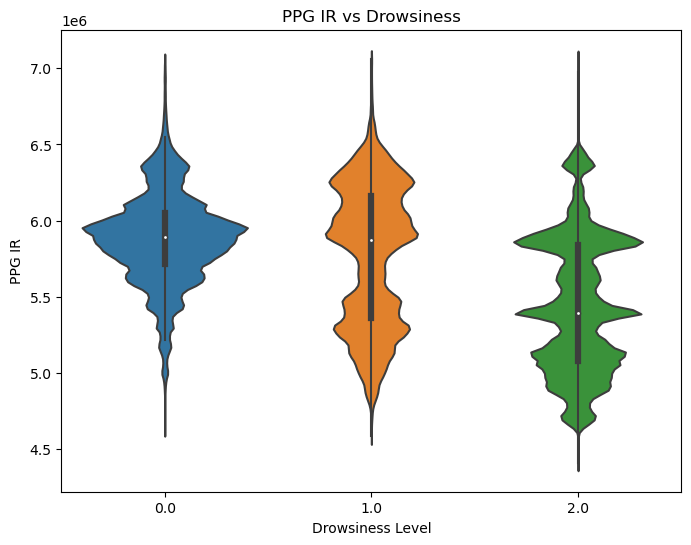

In [14]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='drowsiness', y='heartRate', data=data)
plt.title('Heart Rate vs Drowsiness')
plt.xlabel('Drowsiness Level')
plt.ylabel('Heart Rate')
plt.show()

# Plot for ppgGreen vs drowsiness
plt.figure(figsize=(8, 6))
sns.violinplot(x='drowsiness', y='ppgGreen', data=data)
plt.title('PPG Green vs Drowsiness')
plt.xlabel('Drowsiness Level')
plt.ylabel('PPG Green')
plt.show()

# Plot for ppgRed vs drowsiness
plt.figure(figsize=(8, 6))
sns.violinplot(x='drowsiness', y='ppgRed', data=data)
plt.title('PPG Red vs Drowsiness')
plt.xlabel('Drowsiness Level')
plt.ylabel('PPG Red')
plt.show()

# Plot for ppgIR vs drowsiness
plt.figure(figsize=(8, 6))
sns.violinplot(x='drowsiness', y='ppgIR', data=data)
plt.title('PPG IR vs Drowsiness')
plt.xlabel('Drowsiness Level')
plt.ylabel('PPG IR')
plt.show()

1. Heart Rate vs Drowsiness: There is an Inverse relationship--as drowsiness level increases, average heart rate decreases. Variability: The heart rate variability is highest at drowsiness level 0.0 (most alert) and lowest at level 2.0 (most drowsy).These findings suggest that as people become drowsier, their heart rate tends to slow down and become less variable.
2. PPG Green vs Drowsiness: 0.0 (alert) had the Widest distribution, indicating highest variability in PPG Green values. 1.0 (some sleepiness) Slightly narrower distribution than 0.0. 2.0 (most sleepy signs) Most compact distribution, suggesting less variability in PPG Green values as drowsiness increases. The median PPG Green value appears to increase slightly as drowsiness level increases. These observations suggest that PPG Green values become more concentrated and slightly higher as drowsiness increases. 
3. PPG Red vs Drowsiness: The pattern is similar to PPG Green, but with an opposite trend in median values.These observations suggest that PPG Red values become more concentrated and slightly lower as drowsiness increases. The multi-modal distribution at the highest drowsiness level might indicate some different phases of drowsiness or individual differences in response.
4. PPG IR vs Drowsiness: These observations suggest that PPG IR values become more concentrated and slightly lower as drowsiness increases, but with a more pronounced multi-modal nature. This could be because of different phases of drowsiness, differences in response, or the influence of other factors related to IR.

#### Scatter Plots

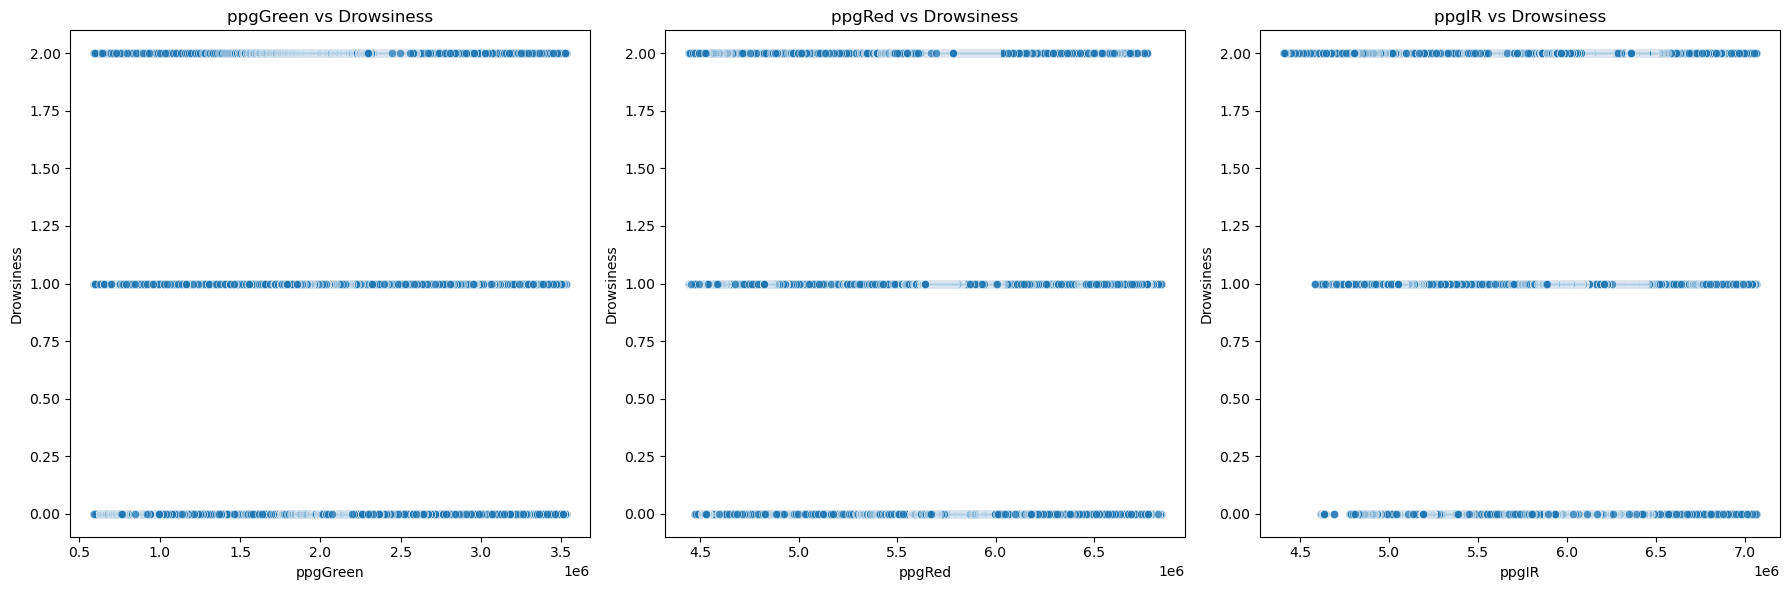

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

ppg_green = data['ppgGreen']
ppg_red = data['ppgRed']
ppg_ir = data['ppgIR']
drowsiness = data['drowsiness']

# Create subplots for each scatter plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Scatter plot of ppgGreen vs drowsiness
sns.scatterplot(x=ppg_green, y=drowsiness, ax=axes[0], alpha=0.7)
axes[0].set_title('ppgGreen vs Drowsiness')
axes[0].set_xlabel('ppgGreen')
axes[0].set_ylabel('Drowsiness')

# Scatter plot of ppgRed vs drowsiness
sns.scatterplot(x=ppg_red, y=drowsiness, ax=axes[1], alpha=0.7)
axes[1].set_title('ppgRed vs Drowsiness')
axes[1].set_xlabel('ppgRed')
axes[1].set_ylabel('Drowsiness')

# Scatter plot of ppgIR vs drowsiness
sns.scatterplot(x=ppg_ir, y=drowsiness, ax=axes[2], alpha=0.7)
axes[2].set_title('ppgIR vs Drowsiness')
axes[2].set_xlabel('ppgIR')
axes[2].set_ylabel('Drowsiness')

plt.tight_layout()
plt.show()

1. For all plots, points are fairly evenly distributed across the x-axis.There are slight variations in point density across drowsiness levels, particularly at the extremes of PPG values.Needs further more deeper analysis

In [23]:
import matplotlib.pyplot as plt

def calculate_and_plot_correlations(data, period_name):
    correlation_heart_rate = data['drowsiness'].corr(data['heartRate'])
    correlation_ppg_green = data['drowsiness'].corr(data['ppgGreen'])
    correlation_ppg_red = data['drowsiness'].corr(data['ppgRed'])
    correlation_ppg_ir = data['drowsiness'].corr(data['ppgIR'])

    print(f'Correlation between drowsiness and heart rate ({period_name}): {correlation_heart_rate}')
    print(f'Correlation between drowsiness and PPG Green ({period_name}): {correlation_ppg_green}')
    print(f'Correlation between drowsiness and PPG Red ({period_name}): {correlation_ppg_red}')
    print(f'Correlation between drowsiness and PPG IR ({period_name}): {correlation_ppg_ir}')


    plt.scatter(data['heartRate'], data['drowsiness'], alpha=0.5, label='Heart Rate')
    plt.scatter(data['ppgGreen'], data['drowsiness'], alpha=0.5, label='PPG Green', color='green')
    plt.scatter(data['ppgRed'], data['drowsiness'], alpha=0.5, label='PPG Red', color='red')
    plt.scatter(data['ppgIR'], data['drowsiness'], alpha=0.5, label='PPG IR', color='purple')
    plt.title(f'Drowsiness Levels vs. Heart Rate and PPG Readings ({period_name})')
    plt.xlabel('Heart Rate and PPG Readings')
    plt.ylabel('Drowsiness Level')
    plt.legend()
    plt.show()

Correlation between drowsiness and heart rate (Morning): -0.6319114762754598
Correlation between drowsiness and PPG Green (Morning): -0.08278873014767009
Correlation between drowsiness and PPG Red (Morning): -0.6565096863047241
Correlation between drowsiness and PPG IR (Morning): -0.5784903897390494


C:\Users\samri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


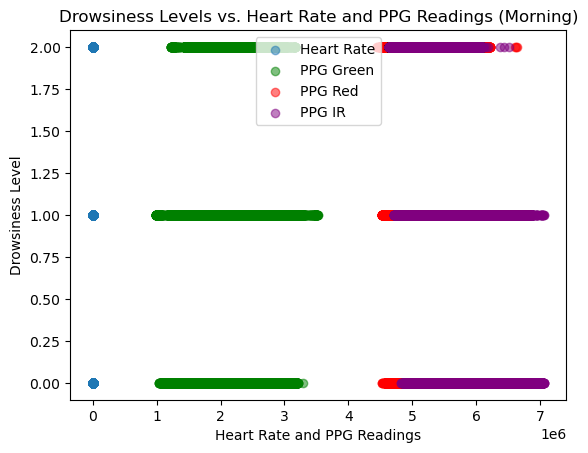

Correlation between drowsiness and heart rate (Afternoon): -0.7295576553745048
Correlation between drowsiness and PPG Green (Afternoon): 0.2414021220021895
Correlation between drowsiness and PPG Red (Afternoon): 0.03613894088399899
Correlation between drowsiness and PPG IR (Afternoon): -0.2655153229308318


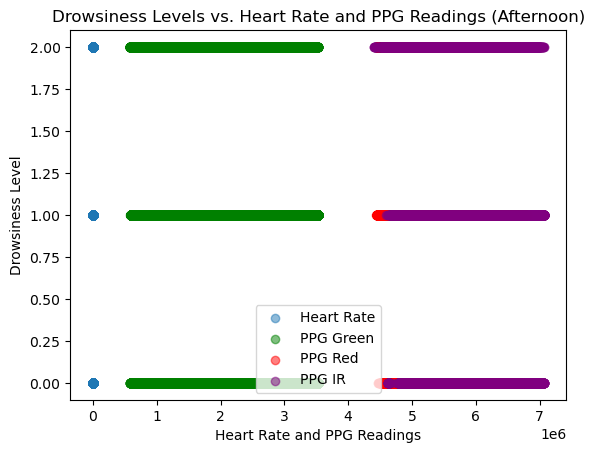

Correlation between drowsiness and heart rate (Evening): -0.6319114762754598
Correlation between drowsiness and PPG Green (Evening): -0.08278873014767009
Correlation between drowsiness and PPG Red (Evening): -0.6565096863047241
Correlation between drowsiness and PPG IR (Evening): -0.5784903897390494


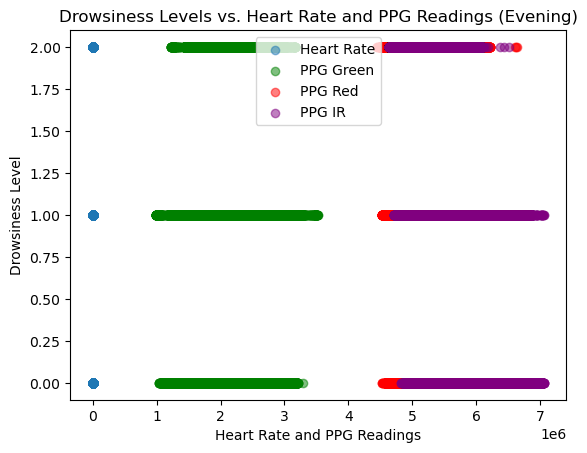

Correlation between drowsiness and heart rate (Night): -0.7295576553745048
Correlation between drowsiness and PPG Green (Night): 0.2414021220021895
Correlation between drowsiness and PPG Red (Night): 0.03613894088399899
Correlation between drowsiness and PPG IR (Night): -0.2655153229308318


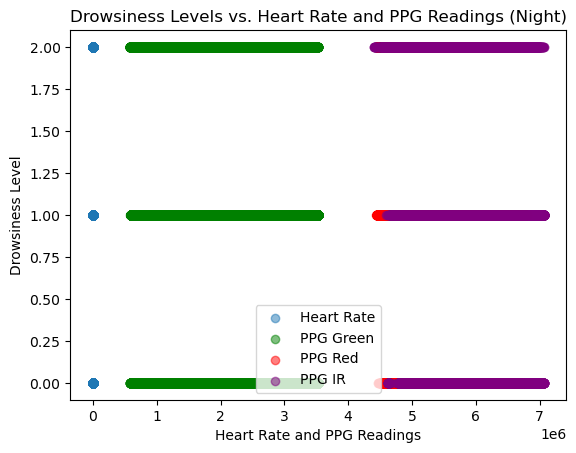

In [24]:
#Calculate and plot correlations for each period
calculate_and_plot_correlations(morning_data, 'Morning')
calculate_and_plot_correlations(afternoon_data, 'Afternoon')
calculate_and_plot_correlations(evening_data, 'Evening')
calculate_and_plot_correlations(night_data, 'Night')

1. Morning Data: There are Negative Correlations in all variables measured with drowsiness levels, indicating that as these values increase, drowsiness tends to decrease.The Strongest negative Correlations are in Heart rate: -0.632 and PPG Red: -0.657; this suggests they may be the most reliable indicators of lower drowsiness in the morning. Higher heart rate and higher PPG red signal values may correspond to lower levels of drowsiness in the morning.The Weakest correlation is PPG Green (-0.083), indicating it may not be a useful predictor.
Heart rate measurements appear more spread out compared to PPG readings, suggesting greater variability.
The PPG Red, Green, and IR readings seem to have similar ranges and distributions, often overlapping on the plot.
These insights suggest that monitoring heart rate and PPG Red readings could be most effective for assessing drowsiness levels in the morning, while PPG Green measurements appear less useful for this purpose.

2. Afternoon Data: There's a strong negative correlation (-0.73) between drowsiness and heart rate. This suggests that as heart rate decreases, drowsiness tends to increase, which aligns with the common understanding that lower heart rates are associated with relaxation and sleepiness.
A weak positive correlation (0.24) exists between drowsiness and PPG Green readings. This might indicate a slight tendency for drowsiness to increase with higher PPG Green values, but the relationship is not very strong.
There's a very weak positive correlation (0.04) between drowsiness and PPG Red readings, suggesting almost no linear relationship between these variables.
PPG IR and Drowsiness:
A weak negative correlation (-0.27) exists between drowsiness and PPG IR readings. This suggests a slight tendency for drowsiness to decrease as PPG IR values increase, but the relationship is not strong.
Heart rate readings seem to be concentrated at lower values, which is consistent with the negative correlation to drowsiness.
Overall, the data suggests that heart rate is the strongest predictor of drowsiness among the variables measured, with lower heart rates associated with higher drowsiness levels.

3. Evening Data: All measured variables show negative correlations with drowsiness, meaning as these values increase, drowsiness tends to decrease.
Heart Rate: There's a strong negative correlation (-0.63) between drowsiness and heart rate. This suggests that lower heart rates are associated with higher drowsiness levels in the evening.
PPG Red shows the strongest negative correlation (-0.66) with drowsiness among the PPG readings. This indicates that lower PPG Red values are strongly associated with increased drowsiness.
PPG IR Has a moderate negative correlation (-0.58) with drowsiness, suggesting a similar but slightly weaker relationship compared to PPG Red.
PPG Green Shows a very weak negative correlation (-0.08) with drowsiness, indicating it may not be a reliable indicator of drowsiness in the evening.
Evening vs. Afternoon: Compared to typical afternoon patterns, evening measurements show stronger negative correlations across most variables, possibly indicating that physiological indicators of drowsiness are more pronounced in the evening.

4. Night Data: Heart Rate: There's a strong negative correlation (-0.73) between drowsiness and heart rate. This suggests that as heart rate decreases, drowsiness tends to increase significantly during nighttime.
PPG Green Shows a weak positive correlation (0.24) with drowsiness. This indicates that higher PPG Green values are slightly associated with increased drowsiness at night.
PPG Red Has a very weak positive correlation (0.04) with drowsiness, suggesting almost no linear relationship between PPG Red readings and drowsiness levels at night.
PPG IR Demonstrates a weak negative correlation (-0.27) with drowsiness. This implies that as PPG IR values increase, there's a slight tendency for drowsiness to decrease.
Night vs. Other Times: The correlations during nighttime show some differences compared to typical patterns seen during other times of day, particularly for PPG Green and Red readings.
 Among all variables, heart rate shows the strongest correlation with drowsiness, suggesting it might be the most reliable indicator of drowsiness levels at night.


#### Correlation Matrix

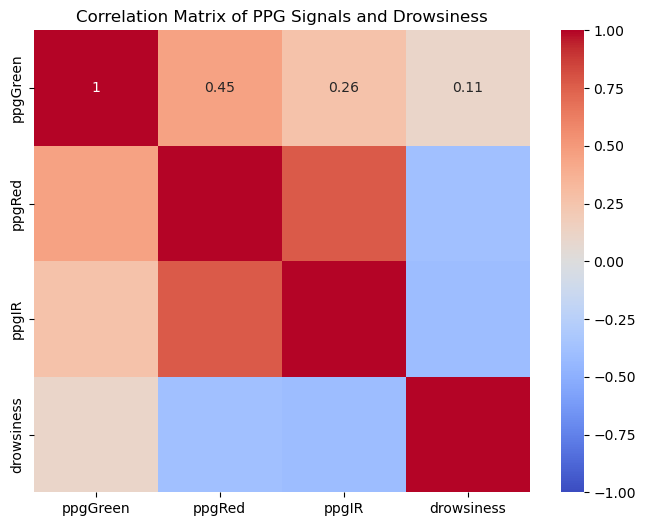

In [16]:
ppg_signals = data[['ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness']]

# Calculate correlation matrix
corr_matrix = ppg_signals.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of PPG Signals and Drowsiness')
plt.show()

- PPG Green and Drowsiness: Weak positive correlation (0.11) Suggests a slight tendency for drowsiness to increase with higher PPG Green values, but the relationship is not strong.


- PPG Red and Drowsiness:Weak negative correlation (-0.25 to -0.50, based on the blue color) Indicates that as PPG Red values increase, drowsiness tends to decrease slightly.


- PPG IR and Drowsiness: Moderate negative correlation (-0.50 to -0.75, based on the blue color) Strongest relationship with drowsiness among the PPG signals. Suggests that higher PPG IR values are associated with lower drowsiness levels.


- Relationships between PPG signals: PPG Green and PPG Red: Moderate positive correlation (0.45) PPG Green and PPG IR: Weak positive correlation (0.26)
PPG Red and PPG IR: Strong positive correlation (0.75 to 1.00, based on the red color).


Key Insights:

- PPG IR appears to be the most useful indicator of drowsiness among the PPG signals, showing the strongest negative correlation.
- PPG Red and PPG IR have a strong positive correlation with each other, suggesting they might be capturing similar physiological information.
-PPG Green has the weakest relationship with drowsiness, indicating it may be less useful for drowsiness detection compared to the other signals.
- The negative correlations of PPG Red and PPG IR with drowsiness suggest that these signals decrease as drowsiness increases, which could be valuable for developing drowsiness detection systems.
- The moderate to strong correlations between PPG signals suggest that using multiple signals in combination might provide more robust drowsiness detection than relying on a single signal.



### Conclusion

-  Heart Rate Patterns and Drowsiness:

A higher heart rate is generally associated with lower drowsiness levels (0.0), indicating alertness.
As drowsiness levels increase (to 1.0 and 2.0), the heart rate tends to decrease, reflecting a state of reduced alertness.

- PPG Signal Trends:

Green PPG signals show the most significant variation across different drowsiness levels, with higher values linked to lower drowsiness.
Red and infrared PPG signals exhibit more stable trends but still indicate a correlation with drowsiness levels.

- Period and Drowsiness Levels:

The mode of the 'period' variable is 'Morning', indicating this time segment is the most common in our dataset.
Drowsiness levels are generally lower during the morning and afternoon periods, while higher drowsiness levels are more prevalent in the evening and night.

- Correlation Insights:
   
PPG IR appears to be the most useful indicator of drowsiness among the PPG signals, showing the strongest negative correlation
A moderate negative correlation exists between heart rate and drowsiness levels, emphasizing that as individuals become drowsier, their heart rate tends to drop. PPG signals, particularly green, show varying degrees of correlation with drowsiness, reinforcing their potential as indicators for monitoring alertness. The moderate to strong correlations between PPG signals suggest that using multiple signals in combination might provide more drowsiness detection than relying on a single signal.


- Morning Insights:
   
There are Negative Correlations in all variables measured with drowsiness levels, indicating that as these values increase, drowsiness tends to decrease.The Strongest negative Correlations are in Heart rate: -0.632 and PPG Red: -0.657; this suggests they may be the most reliable indicators of lower drowsiness in the morning. Higher heart rate and higher PPG red signal values may correspond to lower levels of drowsiness in the morning.The Weakest correlation is PPG Green (-0.083), indicating it may not be a useful predictor. Heart rate measurements appear more spread out compared to PPG readings, suggesting greater variability. The PPG Red, Green, and IR readings seem to have similar ranges and distributions, often overlapping on the plot. These insights suggest that monitoring heart rate and PPG Red readings could be most effective for assessing drowsiness levels in the morning, while PPG Green measurements appear less useful for this purpose.

- Afternoon Insights:

There's a strong negative correlation (-0.73) between drowsiness and heart rate. This suggests that as heart rate decreases, drowsiness tends to increase, which aligns with the common understanding that lower heart rates are associated with relaxation and sleepiness. A weak positive correlation (0.24) exists between drowsiness and PPG Green readings. This might indicate a slight tendency for drowsiness to increase with higher PPG Green values, but the relationship is not very strong. There's a very weak positive correlation (0.04) between drowsiness and PPG Red readings, suggesting almost no linear relationship between these variables. PPG IR and Drowsiness: A weak negative correlation (-0.27) exists between drowsiness and PPG IR readings. This suggests a slight tendency for drowsiness to decrease as PPG IR values increase, but the relationship is not strong. Heart rate readings seem to be concentrated at lower values, which is consistent with the negative correlation to drowsiness. Overall, the data suggests that heart rate is the strongest predictor of drowsiness among the variables measured, with lower heart rates associated with higher drowsiness levels.


- Evening Insights:

All measured variables show negative correlations with drowsiness, meaning as these values increase, drowsiness tends to decrease. Heart Rate: There's a strong negative correlation (-0.63) between drowsiness and heart rate. This suggests that lower heart rates are associated with higher drowsiness levels in the evening. PPG Red shows the strongest negative correlation (-0.66) with drowsiness among the PPG readings. This indicates that lower PPG Red values are strongly associated with increased drowsiness. PPG IR Has a moderate negative correlation (-0.58) with drowsiness, suggesting a similar but slightly weaker relationship compared to PPG Red. PPG Green Shows a very weak negative correlation (-0.08) with drowsiness, indicating it may not be a reliable indicator of drowsiness in the evening. Evening vs. Afternoon: Compared to typical afternoon patterns, evening measurements show stronger negative correlations across most variables, possibly indicating that physiological indicators of drowsiness are more pronounced in the evening.


- Night Insights:

Heart Rate: There's a strong negative correlation (-0.73) between drowsiness and heart rate. This suggests that as heart rate decreases, drowsiness tends to increase significantly during nighttime. PPG Green Shows a weak positive correlation (0.24) with drowsiness. This indicates that higher PPG Green values are slightly associated with increased drowsiness at night. PPG Red Has a very weak positive correlation (0.04) with drowsiness, suggesting almost no linear relationship between PPG Red readings and drowsiness levels at night. PPG IR Demonstrates a weak negative correlation (-0.27) with drowsiness. This implies that as PPG IR values increase, there's a slight tendency for drowsiness to decrease. Night vs. Other Times: The correlations during nighttime show some differences compared to typical patterns seen during other times of day, particularly for PPG Green and Red readings. Among all variables, heart rate shows the strongest correlation with drowsiness, suggesting it might be the most reliable indicator of drowsiness levels at night.



### Recommendations for Further Analysis/Implications

- Explore the development of personalized drowsiness detection models tailored to individual users based on their unique physiological patterns to enhance accuracy and reliability.

- Perform segment analysis to compare drowsiness patterns across different demographic groups (e.g., age, gender) if such data is available to identify potential differences.
  
- Combining PPG and heart rate data with other physiological signals, such as body temperature and movement, for better monitoring.

- Devices can be programmed to provide alerts when heart rates fall below certain thresholds, indicating increased drowsiness, particularly during night and evening times.